### Diamond Price Prediction


##### 1.Data collection and cleaning


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #importing libraries

In [17]:
df = pd.read_csv('/kaggle/input/diamond-dataset/cubic_zirconia.csv')

In [18]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


#### Data Dictionary

In [19]:
df.shape

(26967, 11)

In [20]:
df[df.duplicated()] #Checking Duplicates

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


In [21]:
df.drop('Unnamed: 0', inplace = True, axis = 1) #dropped the unnecessary column from the dataset

In [22]:
df #checking the data frame

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [23]:
df.describe().T #checking desription of the dataset

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


❗Seems like there are some missing values in the depth column of the data set

❗Also we can see that there are values as 0 in x, y, z columns of the dataset, which represents length width and height of the diamond and it can not be 0. We will have to check all such record

In [24]:
df.isnull().sum() #Checking missing value

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

<Axes: >

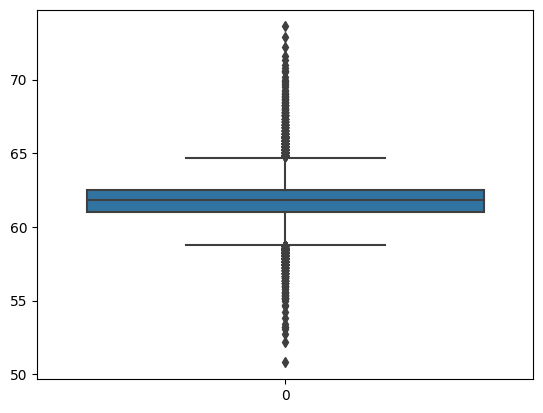

In [25]:
sns.boxplot(df['depth'])

In [26]:
df = df.fillna(df['depth'].median())

In [27]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)] #checking the rows with 0 values in any of the column amongst x, y, z

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [29]:
drop = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index #here we have taken out the index of all the values having 0 in x or y or z an stored in drop assignment

In [30]:
df.drop(drop[0:], inplace=True) #we have dropped all the selected index from the drop assignment

In [31]:
df.reset_index(inplace=True) #We have reset the index here.

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26958.0,13483.289524,7785.384674,0.00,6742.2500,13484.50,20225.75,26966.00
carat,26958.0,0.798190,0.477602,0.20,0.4000,0.70,1.05,4.50
depth,26958.0,61.746758,1.394043,50.80,61.1000,61.80,62.50,73.60
table,26958.0,57.455342,2.231227,49.00,56.0000,57.00,59.00,79.00
x,26958.0,5.730105,1.126714,3.73,4.7100,5.69,6.55,10.23
y,26958.0,5.733832,1.164342,3.71,4.7125,5.70,6.54,58.90
z,26958.0,3.539238,0.717838,1.07,2.9000,3.52,4.04,31.80
price,26958.0,3938.311262,4023.359737,326.00,945.0000,2375.00,5358.00,18818.00


In [33]:
df.drop('index', inplace = True, axis = 1)

In [34]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26953,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26954,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26955,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26956,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26958.0,0.798190,0.477602,0.20,0.4000,0.70,1.05,4.50
depth,26958.0,61.746758,1.394043,50.80,61.1000,61.80,62.50,73.60
table,26958.0,57.455342,2.231227,49.00,56.0000,57.00,59.00,79.00
x,26958.0,5.730105,1.126714,3.73,4.7100,5.69,6.55,10.23
y,26958.0,5.733832,1.164342,3.71,4.7125,5.70,6.54,58.90
z,26958.0,3.539238,0.717838,1.07,2.9000,3.52,4.04,31.80
price,26958.0,3938.311262,4023.359737,326.00,945.0000,2375.00,5358.00,18818.00


✅We have treated the missing value and have dropped the columns containing 0 in x, y and z



##### 2.Exploratory Data Analysis and Feature Selection

In [36]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [37]:
sns.set_palette("rocket")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26958 entries, 0 to 26957
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


<Axes: xlabel='cut', ylabel='price'>

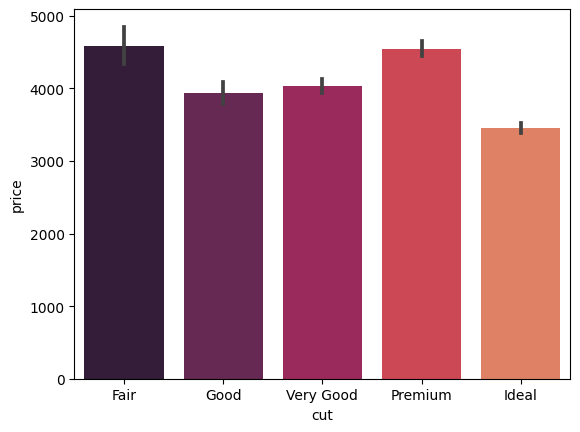

In [39]:
sns.barplot(data = df, x = df['cut'], y = df['price'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<Axes: xlabel='color', ylabel='price'>

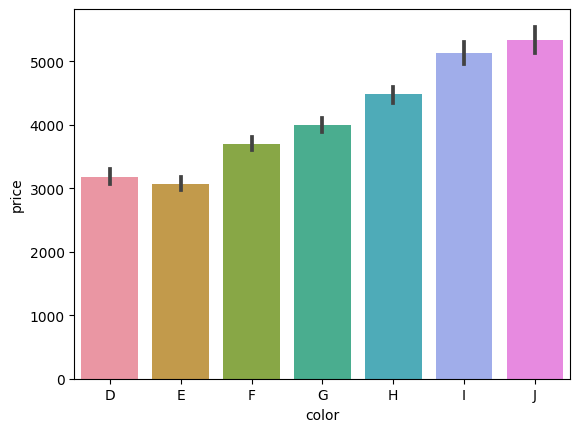

In [40]:
sns.barplot(data = df, x = df['color'], y = df['price'], order = ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

<Axes: xlabel='clarity', ylabel='price'>

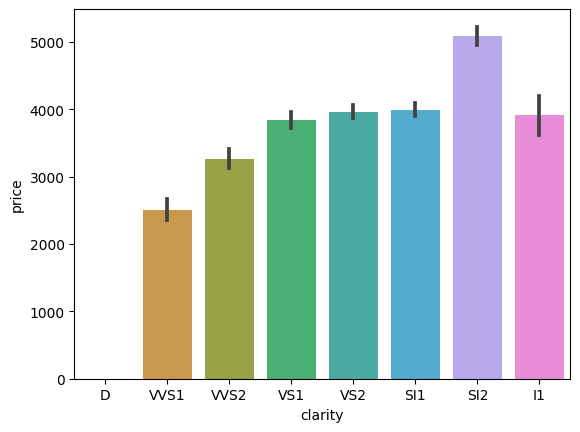

In [41]:
sns.barplot(data = df, y = df['price'], x = df['clarity'], order = ['D', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])

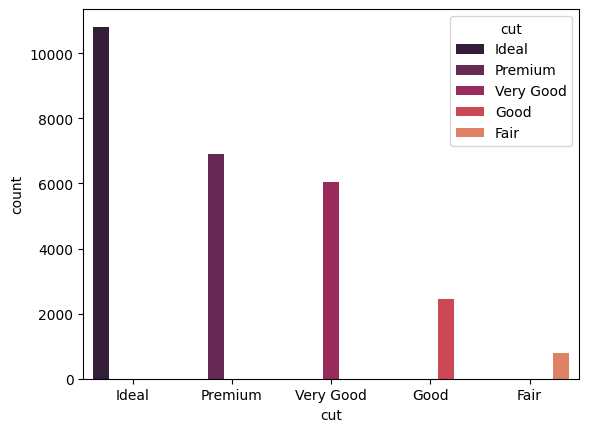

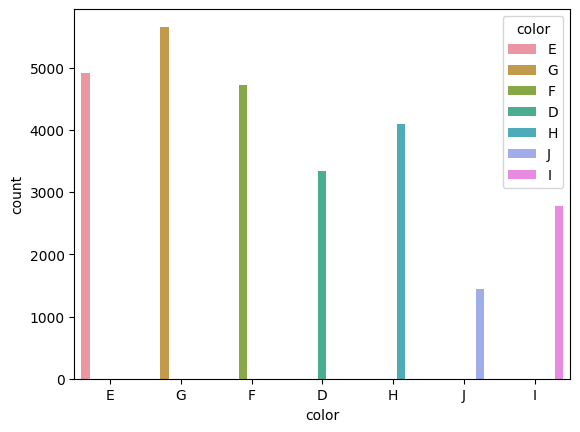

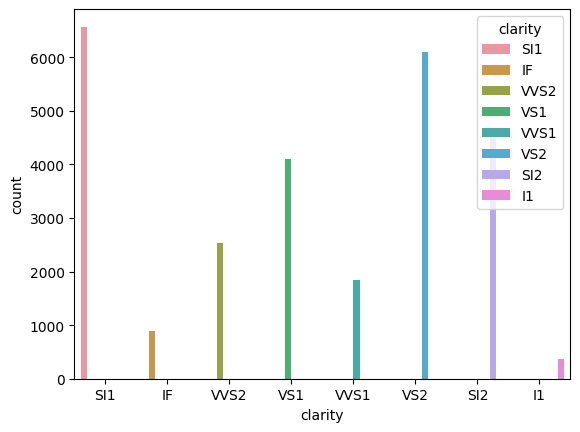

In [42]:
for i in df.select_dtypes(include = 'object').columns:
    sns.countplot(data = df, x = i, hue = i )
    plt.show()

###### We can see that we can combine Good and Very Good in one as they have similar mean with no major difference, similar the case with VS1 and VS2 clarity and D and E color

In [43]:
df['cut'] = df['cut'].replace({'Very Good': 'Good_Very_Good', 'Good': 'Good_Very_Good'})

In [44]:
df['clarity'] = df['clarity'].replace({'VS1': 'VS1_VS2', 'VS2': 'VS1_VS2'})

In [45]:
df['color'] = df['color'].replace({'D': 'D_E', 'E': 'D_E', 'F' : 'F_G', 'G' : 'F_G'})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


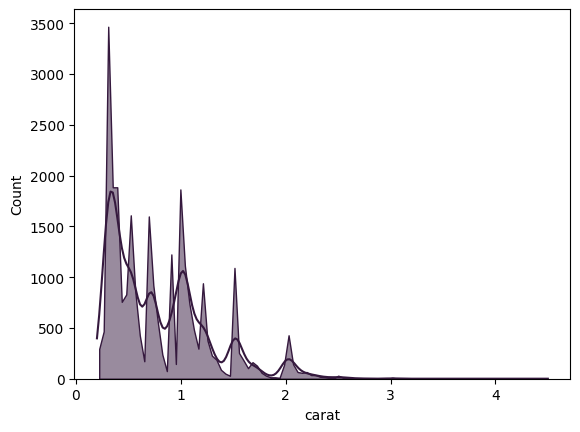

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


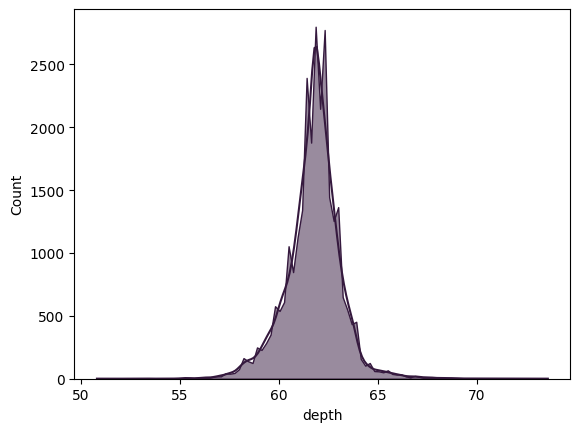

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


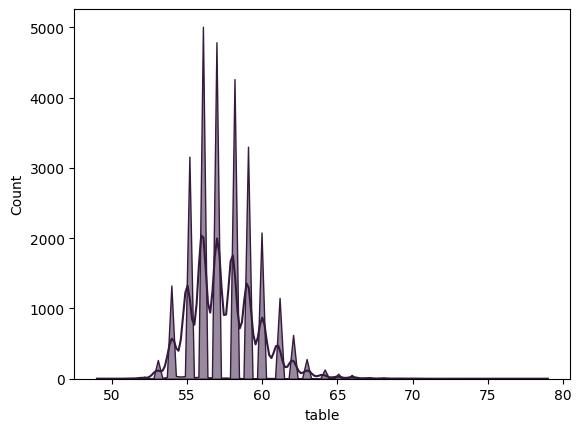

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


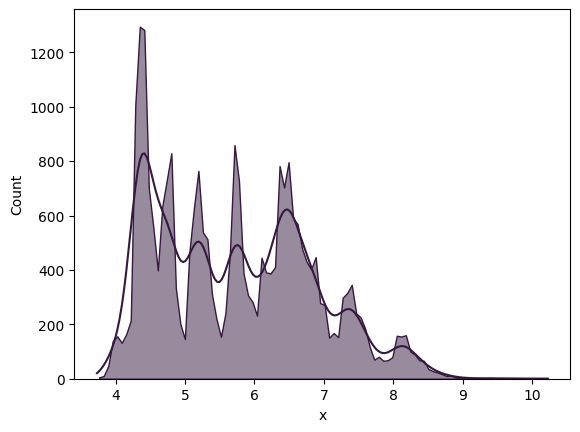

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


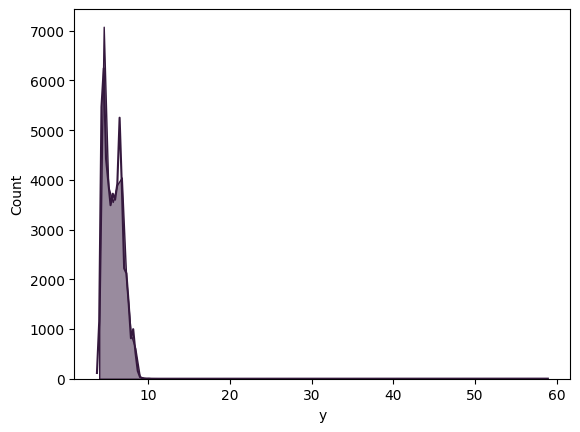

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


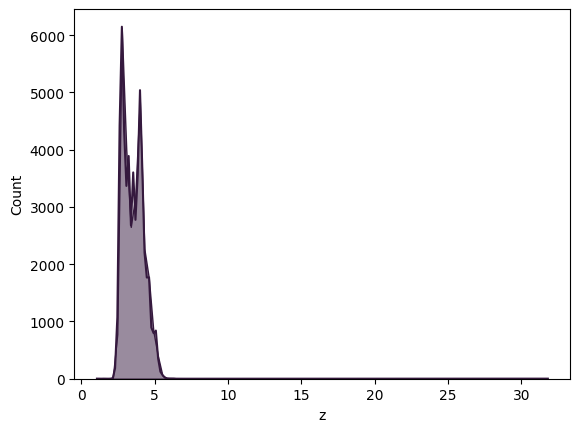

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


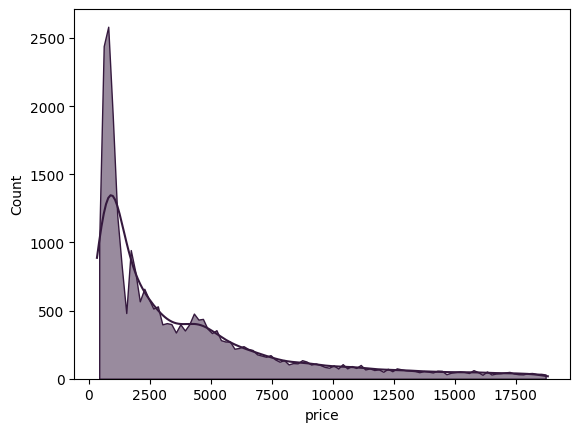

In [46]:
for i in df.select_dtypes(exclude = 'object').columns:
    sns.histplot(data = df, x = i, bins = 100, kde = True, element='poly')
    plt.show()

###### Carat Seem to be leftward skewed, with most preffered carat as lower with some high carat diamond 
###### Depth seem to be distributed normally and is most preffered around the central value.
###### Table is slightly left skewed with preffered table to be between 55 and 60 with some outliers beyond 9
###### Y, width seem to be highly left skewed with most preffred value as below 10, seems like we have a higher width diamond with 60 mm width
###### x, length seem to be left skewed wiuth most of the values below 7 mm
###### z, height is also left skewed with extrme outliers beyond 8 mm while the average is between 3 and 4 mm
###### We have most of the prices below 7500 we have some very extreme outliers going beyond 12500


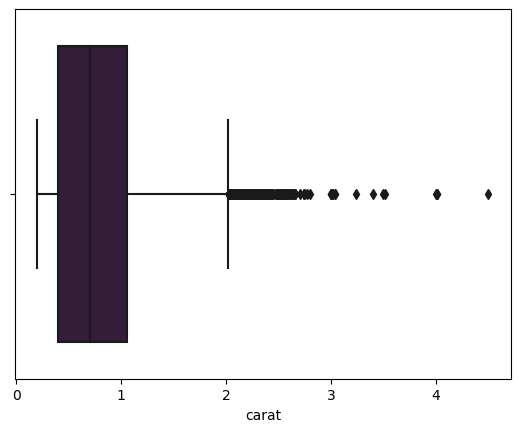

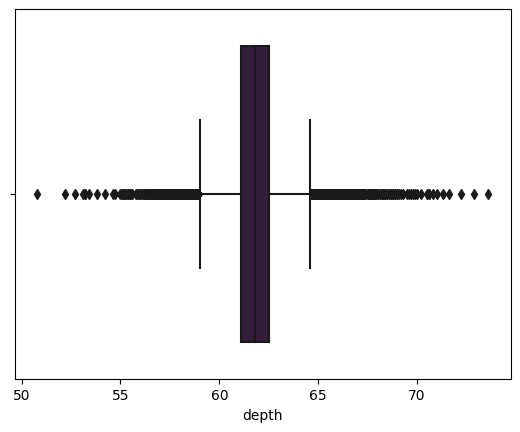

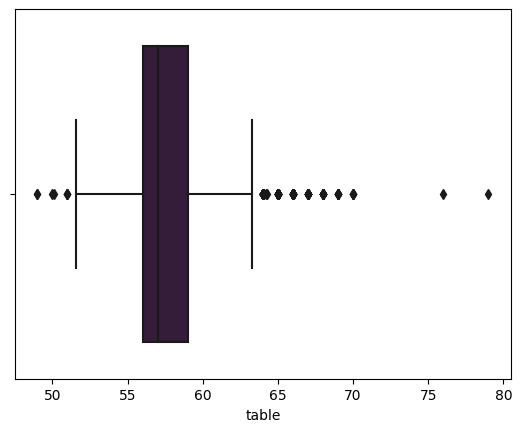

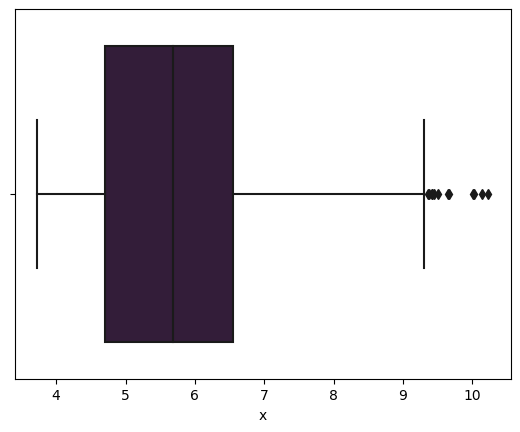

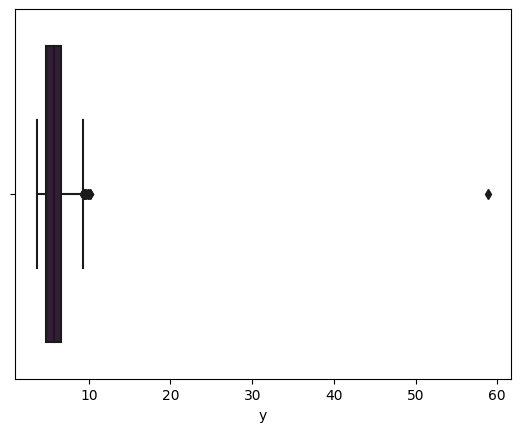

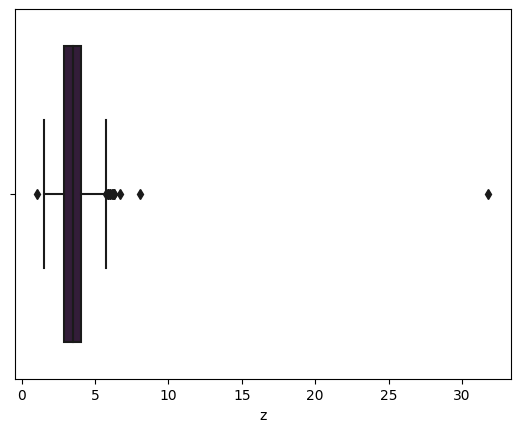

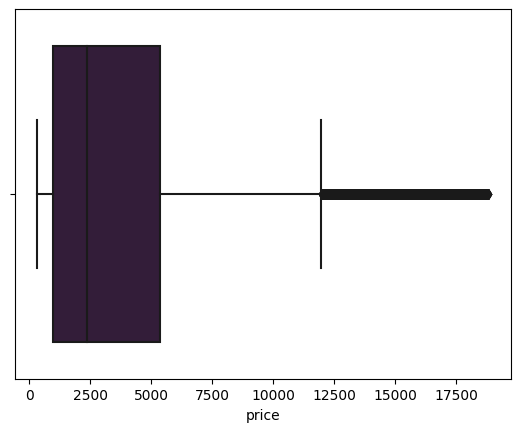

In [47]:
for i in df.select_dtypes(exclude = 'object').columns:
    sns.boxplot(data = df, x = i)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

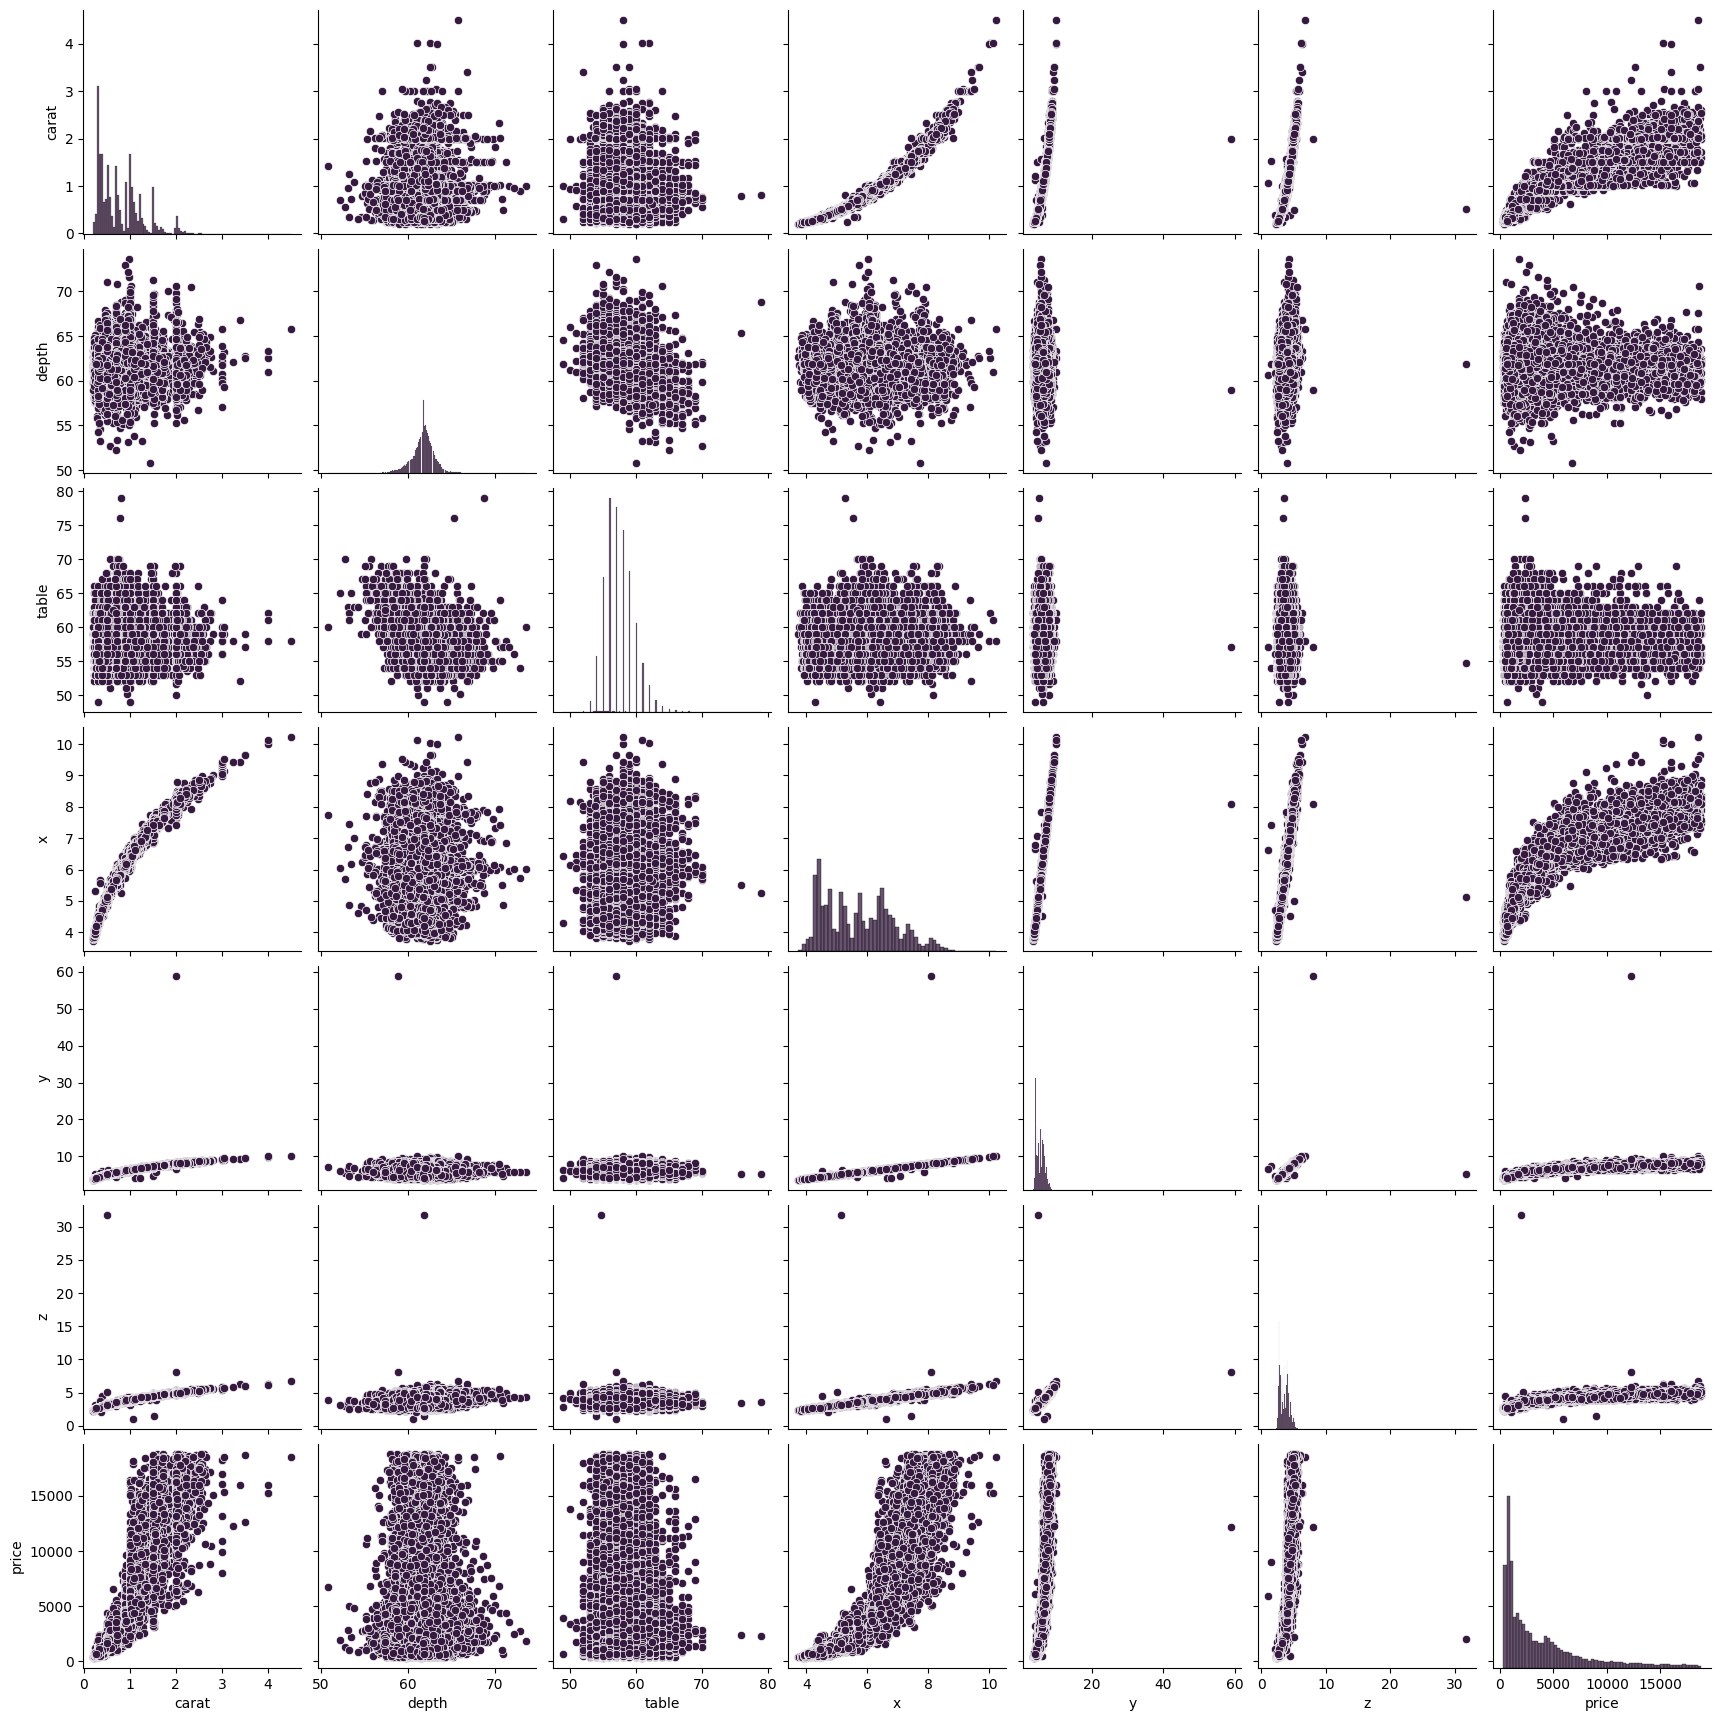

In [48]:
sns.pairplot(df)

In [49]:
df[df.select_dtypes(exclude = 'object').columns[:]].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035237,0.181669,0.977848,0.942393,0.946805,0.922409
depth,0.035237,1.000000,-0.293695,-0.018186,-0.024180,0.097171,-0.002334
table,0.181669,-0.293695,1.000000,0.197780,0.183832,0.151259,0.127088
x,0.977848,-0.018186,0.197780,1.000000,0.962590,0.961077,0.887501
y,0.942393,-0.024180,0.183832,0.962590,1.000000,0.933100,0.857361
z,0.946805,0.097171,0.151259,0.961077,0.933100,1.000000,0.855920
price,0.922409,-0.002334,0.127088,0.887501,0.857361,0.855920,1.000000


<Axes: >

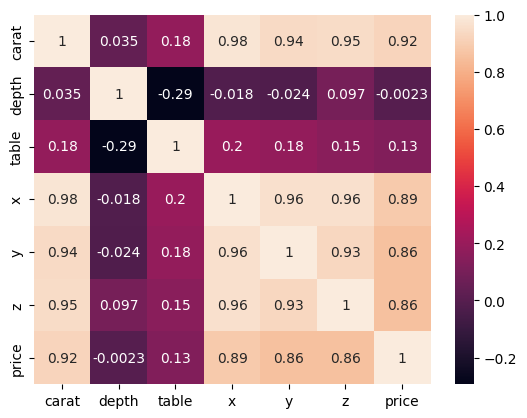

In [50]:
sns.heatmap(df[df.select_dtypes(exclude = 'object').columns[:]].corr(), annot = True)

###### We can see Price have High Corellation with Carat, X, Y, Z, they can be good predictors for the Price. However we can see that thease feature also are multicolinear with each other. 

###### We can see all the three variable have an order, so we will have to proceed with Ordinal Encoding here.



In [51]:
mapping_clarity = {'IF': 6, 'VVS1': 5, 'VVS2': 4, 'VS1_VS2': 3, 'SI1': 2, 'SI2': 1, 'I1': 0}

In [52]:
df['clarity'] = df['clarity'].map(mapping_clarity)

In [53]:
mapping_color = {'J': 4, 'I': 3, 'H': 2, 'F_G': 1, 'D_E': 0}

In [54]:
df['color'] = df['color'].map(mapping_color)

In [55]:
mapping_cut = {'Fair': 3, 'Good_Very_Good': 2, 'Premium': 1, 'Ideal': 0}

In [56]:
df['cut'] = df['cut'].map(mapping_cut)

In [57]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

##### 3. Splitting the data into X and Y, we will seprate our target variable and predictors



In [58]:
X_m1 = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]   # predictors
y = df['price']            # predictive variable

In [59]:
X_m1.shape

(26958, 9)

In [60]:
y.shape

(26958,)

##### 4. Model Training (All Variables)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_m1_train, X_m1_test, y_train, y_test = train_test_split(X_m1,y, test_size = 0.3, random_state = 2)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model1 = LinearRegression()

In [65]:
model1.fit(X_m1_train, y_train)

LinearRegression()

In [66]:
model1.coef_

array([ 1.14849545e+04, -1.03512003e+02, -5.05542260e+02,  6.33240760e+02,
       -1.00391406e+02, -3.05577982e+01, -1.12761032e+03,  6.79133720e+00,
       -3.24158602e+01])

In [67]:
coefficients_m1 = model1.coef_
feature_names = X_m1.columns

# Create a DataFrame to show feature names alongside their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_m1
})

print(coef_df)

   Feature   Coefficient
0    carat  11484.954498
1      cut   -103.512003
2    color   -505.542260
3  clarity    633.240760
4    depth   -100.391406
5    table    -30.557798
6        x  -1127.610318
7        y      6.791337
8        z    -32.415860


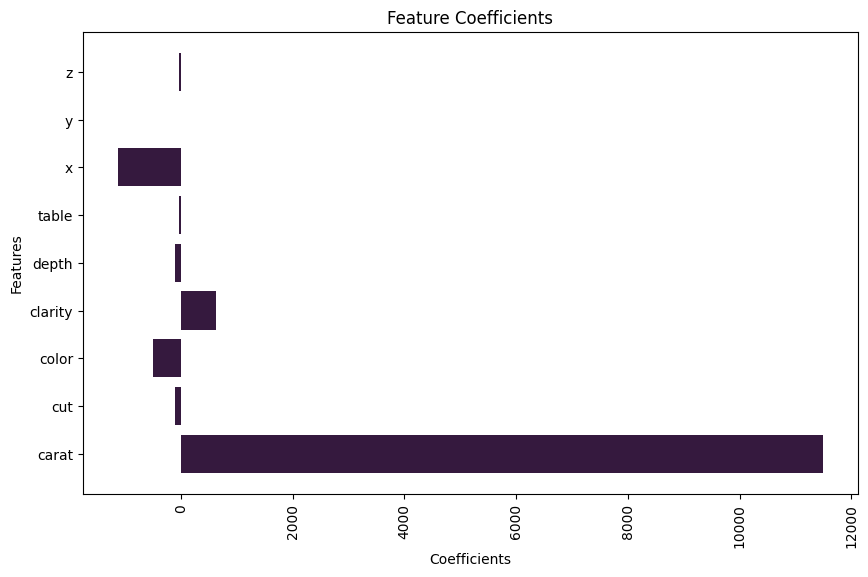

In [68]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients_m1)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.title('Feature Coefficients')
plt.show()

In [69]:
from sklearn.metrics import r2_score

In [70]:
y_pred = model1.predict(X_m1_train)
r_squared = r2_score(y_train, y_pred)

n = X_m1_train.shape[0]  # Number of observations
p = X_m1_train.shape[1]  # Number of predictors

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-Squared:", r_squared)
print("Adjusted R-Squared:", adjusted_r_squared)

R-Squared: 0.9134191365667048
Adjusted R-Squared: 0.9133778201419487


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [72]:
# RMSE
rmse = mean_squared_error(y_train, y_pred, squared=False)
print("RMSE:", rmse)

# MAPE
mape = mean_absolute_percentage_error(y_train, y_pred)
print("MAPE:", mape)

RMSE: 1182.4703884865867
MAPE: 0.42561387232489584


In [73]:
from scipy import stats

In [74]:
residuals_m1 = y_train - y_pred

In [75]:
residual_mean = residuals_m1.mean()
print("Residual Mean:", residual_mean)

Residual Mean: 3.2215488005565724e-12


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


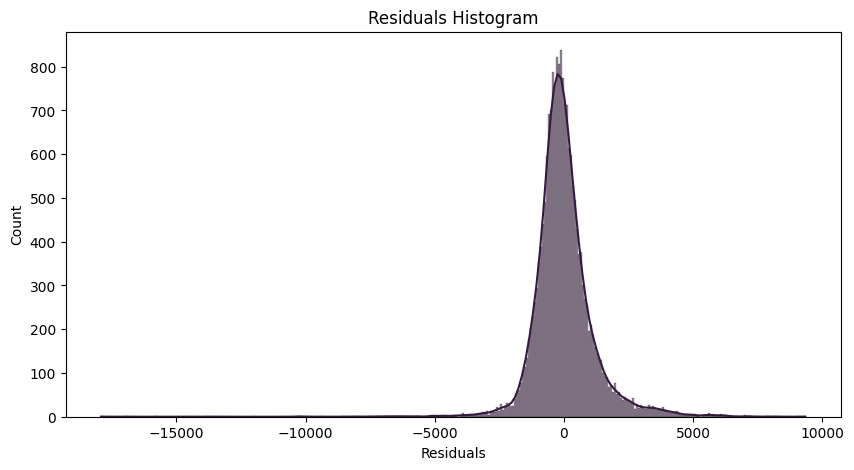

In [76]:
# Residual Histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals_m1, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.show()

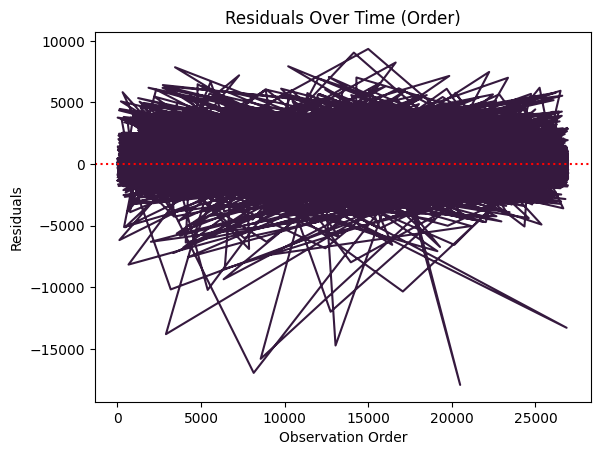

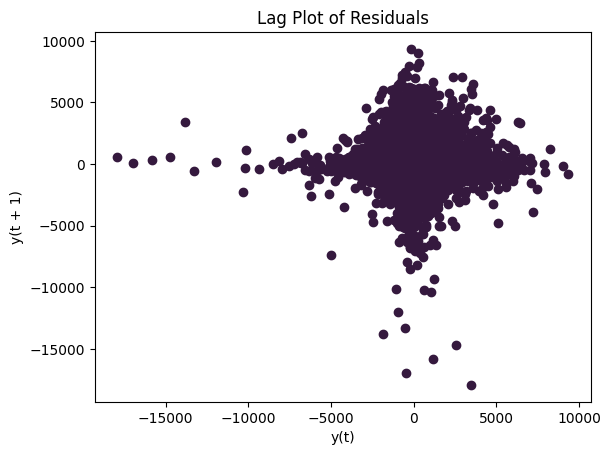

In [77]:
plt.plot(residuals_m1)
plt.axhline(0, color='red', linestyle=':')
plt.title('Residuals Over Time (Order)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()

# Lag Plot (to see autocorrelation visually)
pd.plotting.lag_plot(pd.Series(residuals_m1))
plt.title('Lag Plot of Residuals')
plt.show()

In [78]:
model_metrics_df = pd.DataFrame(columns=['Model', 'R²', 'Adjusted R²', 'MAPE', 'RMSE'])

In [79]:
model_metrics_df

,Model,R²,Adjusted R²,MAPE,RMSE


In [80]:
model_metrics_df['Model'] == 'M1'

Series([], Name: Model, dtype: bool)

In [81]:
model_metrics_df = pd.DataFrame({'Model': ['M1'], 
                                 'R²': r_squared,
                                 'Adjusted R²': adjusted_r_squared, 
                                 'MAPE': mape, 
                                 'RMSE' : rmse
                                })

In [82]:
model_metrics_df

,Model,R²,Adjusted R²,MAPE,RMSE
0,M1,0.913419,0.913378,0.425614,1182.470388


##### Model Training (Positive Coeff Variables)

In [83]:
model2 = LinearRegression()

In [84]:
X_m2 = df[['carat', 'clarity']]

In [85]:
X_m2

,carat,clarity
0,0.30,2
1,0.33,6
2,0.90,4
3,0.42,3
4,0.31,5
...,...,...
26953,1.11,2
26954,0.33,6
26955,0.51,3
26956,0.27,4


In [86]:
X_m2_train, X_m2_test, y_train, y_test = train_test_split(X_m2,y, test_size = 0.3, random_state = 2)

In [87]:
model2.fit(X_m2_train, y_train)

LinearRegression()

In [88]:
model2.coef_

array([8419.9807257,  640.4424963])

In [89]:
coefficients_m2 = model2.coef_
feature_names = X_m2.columns

# Create a DataFrame to show feature names alongside their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_m2
})

print(coef_df)

   Feature  Coefficient
0    carat  8419.980726
1  clarity   640.442496


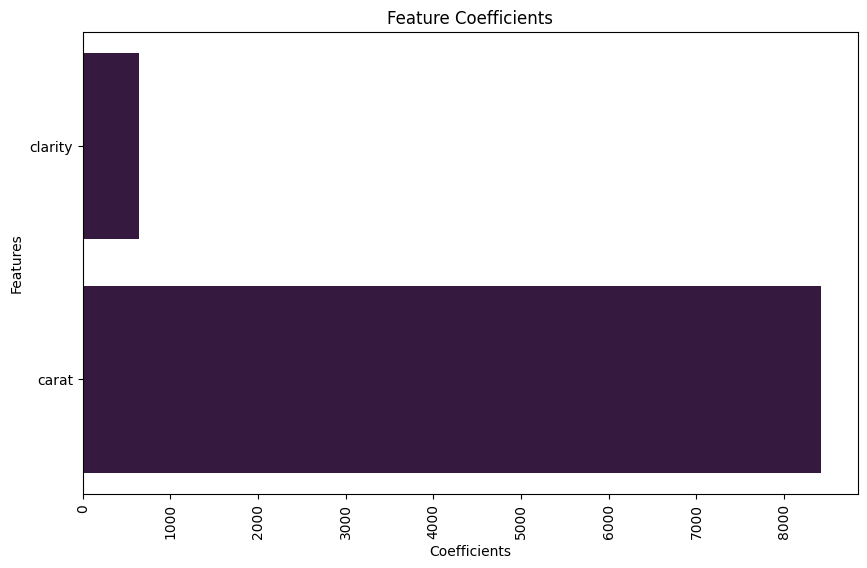

In [90]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients_m2)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.title('Feature Coefficients')
plt.show()

In [91]:
y_pred = model2.predict(X_m2_train)
r_squared_m2 = r2_score(y_train, y_pred)

n = X_m2_train.shape[0]  # Number of observations
p = X_m2_train.shape[1]  # Number of predictors

adjusted_r_squared_m2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-Squared:", r_squared)
print("Adjusted R-Squared:", adjusted_r_squared)

R-Squared: 0.9134191365667048
Adjusted R-Squared: 0.9133778201419487


In [92]:
# RMSE
rmse_m2 = mean_squared_error(y_train, y_pred, squared=False)
print("RMSE:", rmse)

# MAPE
mape_m2 = mean_absolute_percentage_error(y_train, y_pred)
print("MAPE:", mape)

RMSE: 1182.4703884865867
MAPE: 0.42561387232489584


In [93]:
residuals_m2 = y_train - y_pred

In [94]:
residual_mean = residuals_m1.mean()
print("Residual Mean:", residual_mean)

Residual Mean: 3.2215488005565724e-12


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


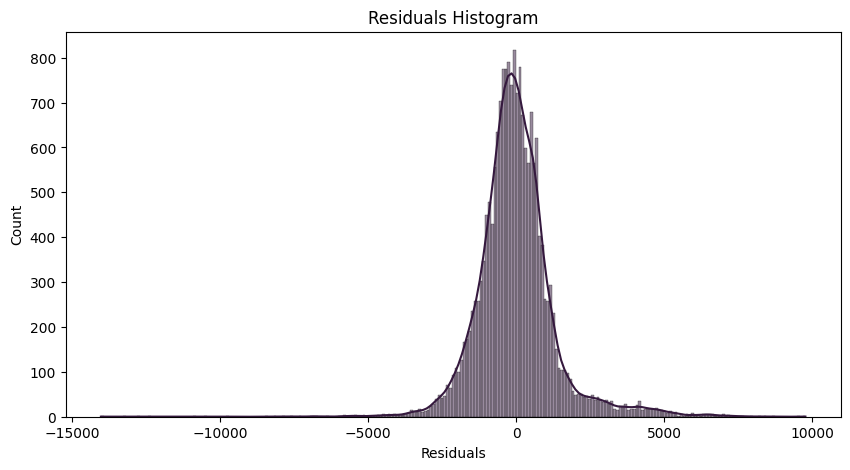

In [95]:
# Residual Histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals_m2, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.show()

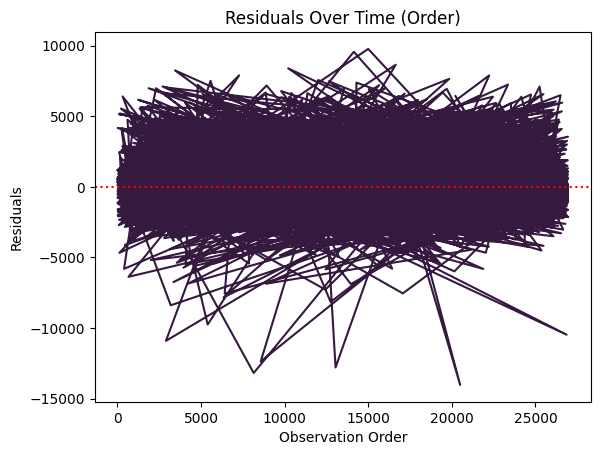

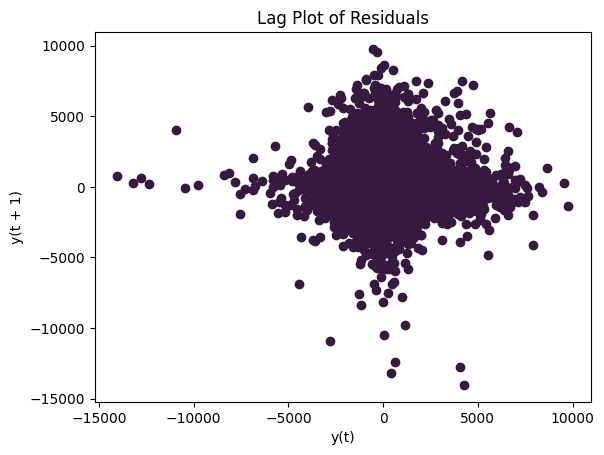

In [96]:
plt.plot(residuals_m2)
plt.axhline(0, color='red', linestyle=':')
plt.title('Residuals Over Time (Order)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()

# Lag Plot (to see autocorrelation visually)
pd.plotting.lag_plot(pd.Series(residuals_m2))
plt.title('Lag Plot of Residuals')
plt.show()

In [97]:
m2_metric = {
    'Model': ['M2'], 
    'R²': [r_squared_m2],  # Ensure single values are wrapped in lists
    'Adjusted R²': [adjusted_r_squared_m2], 
    'MAPE': [mape_m2], 
    'RMSE': [rmse_m2]
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(m2_metric)

# Concatenate the new DataFrame with the existing one
model_metrics_df = pd.concat([model_metrics_df, new_data_df], ignore_index=True)

In [98]:
model_metrics_df = model_metrics_df.drop(model_metrics_df.index[-1])

In [99]:
model_metrics_df

,Model,R²,Adjusted R²,MAPE,RMSE
0,M1,0.913419,0.913378,0.425614,1182.470388
